# Train VAE

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import ast
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings(action='ignore')

sys.path.append("../")
from functions import vae

from numpy.random import seed
randomState = 123
seed(randomState)

Using TensorFlow backend.


In [2]:
# Create list of base directories

base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

base_dirs = [os.path.join(base_dir, "data"),
             os.path.join(base_dir, "models"),
             os.path.join(base_dir, "output"),
             os.path.join(base_dir, "data", "encoded"),
             os.path.join(base_dir, "output", "stats"),
             os.path.join(base_dir, "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in base_dirs:

    if os.path.exists(each_dir):
        print('directory already exists: {}'.format(each_dir))
    else:
        print('creating new directory: {}'.format(each_dir))
    os.makedirs(each_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz


In [3]:
# Load config params
config_file = "config_exp_1.txt"

d = {}
float_params = ["learning_rate", "kappa", "epsilon_std"]
str_params = ["analysis_name", "NN_architecture"]
lst_params = ["num_batches"]
with open(config_file) as f:
    for line in f:
        (name, val) = line.split()
        if name in float_params:
            d[name] = float(val)
        elif name in str_params:
            d[name] = str(val)
        elif name in lst_params:
            d[name] = ast.literal_eval(val)
        else:
            d[name] = int(val)

In [4]:
# Parameters
num_dims = d["num_dims"]

In [5]:
# Load arguments
normalized_data_file = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(),"../..")),
    "data",
    "input",
    "train_set_normalized.pcl")

In [6]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)

(950, 5549)


In [7]:
# Parameters 
learning_rate = d['learning_rate']
batch_size = d['batch_size']
epochs = d['epochs']
kappa = d['kappa']
intermediate_dim = d['intermediate_dim']
latent_dim = d['latent_dim']
epsilon_std = d['epsilon_std']
num_PCs = latent_dim
train_architecture = "NN_{}_{}".format(intermediate_dim, latent_dim)

In [8]:
# Create output directories

output_dirs = [os.path.join(base_dir, "data", "encoded"),
             os.path.join(base_dir, "models"),
             os.path.join(base_dir, "output", "stats"),
             os.path.join(base_dir, "output", "viz")
             ]

# Check if analysis directory exist otherwise create

for each_dir in output_dirs:
    new_dir = os.path.join(each_dir, train_architecture)
    
    if os.path.exists(new_dir):
        print('directory already exists: {}'.format(new_dir))
    else:
        print('creating new directory: {}'.format(new_dir))
    os.makedirs(new_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz/NN_2500_30


Train on 855 samples, validate on 95 samples
Epoch 1/100
855/855 [==============================] - 7s 8ms/step - loss: 3611.1525 - val_loss: 3816.1125
Epoch 2/100
855/855 [==============================] - 6s 7ms/step - loss: 3495.2920 - val_loss: 3551.1631
Epoch 3/100
855/855 [==============================] - 6s 6ms/step - loss: 3473.2418 - val_loss: 3482.1953
Epoch 4/100
855/855 [==============================] - 6s 7ms/step - loss: 3456.7678 - val_loss: 3456.3940
Epoch 5/100
855/855 [==============================] - 6s 7ms/step - loss: 3444.9030 - val_loss: 3459.7307
Epoch 6/100
855/855 [==============================] - 5s 6ms/step - loss: 3436.7637 - val_loss: 3416.9893
Epoch 7/100
855/855 [==============================] - 5s 6ms/step - loss: 3431.3799 - val_loss: 3434.4470
Epoch 8/100
855/855 [==============================] - 5s 6ms/step - loss: 3427.3698 - val_loss: 3411.0513
Epoch 9/100
855/855 [==============================] - 5s 6ms/step - loss: 3419.9824 - val_loss: 34

855/855 [==============================] - 6s 7ms/step - loss: 3317.6487 - val_loss: 3316.3596
Epoch 77/100
855/855 [==============================] - 5s 6ms/step - loss: 3317.1997 - val_loss: 3313.5674
Epoch 78/100
855/855 [==============================] - 5s 6ms/step - loss: 3314.9600 - val_loss: 3307.8259
Epoch 79/100
855/855 [==============================] - 5s 6ms/step - loss: 3314.9352 - val_loss: 3311.3474
Epoch 80/100
855/855 [==============================] - 5s 6ms/step - loss: 3314.3590 - val_loss: 3307.4714
Epoch 81/100
855/855 [==============================] - 5s 6ms/step - loss: 3312.7606 - val_loss: 3307.6812
Epoch 82/100
855/855 [==============================] - 5s 6ms/step - loss: 3312.9953 - val_loss: 3306.6299
Epoch 83/100
855/855 [==============================] - 5s 6ms/step - loss: 3312.4761 - val_loss: 3305.8276
Epoch 84/100
855/855 [==============================] - 5s 6ms/step - loss: 3312.7004 - val_loss: 3308.9504
Epoch 85/100
855/855 [===================

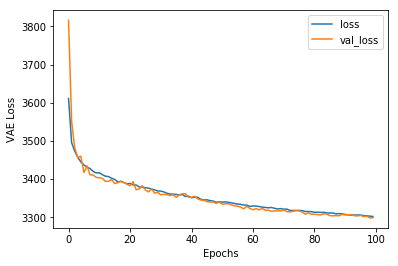

In [9]:
# Train nonlinear (VAE)
vae.tybalt_2layer_model(learning_rate,
                        batch_size,
                        epochs, 
                        kappa, 
                        intermediate_dim,
                        latent_dim, 
                        epsilon_std,
                        normalized_data,
                        base_dir, 
                        train_architecture 
                        )